# Health Insurance Fraud detection
#### Analysed by : Osafa Karim (osafa.karim@capgemini.com)
#### Analysed for : CapGemini Internal POC
#### Data Scource : https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis#Test-1542969243754.csv


In [44]:
# import the required libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time

##### loading the data sets in pandas data-frame

In [18]:
os.listdir()

['Train_Inpatientdata-1542865627584.csv',
 'Train_Outpatientdata-1542865627584.csv',
 'Test_Inpatientdata-1542969243754.csv',
 'Test_Beneficiarydata-1542969243754.csv',
 'Train-1542865627584.csv',
 'Train_Beneficiarydata-1542865627584.csv',
 'Test_Outpatientdata-1542969243754.csv',
 '.ipynb_checkpoints',
 'Health Insurance Fraud Detection.ipynb',
 'Test-1542969243754.csv']

In [19]:
df = {}
for a in os.listdir():
    if a[:5]  == 'Train':
        star_t = time.time()
        #df_name = 'df_'.join(a)
        df[a[:9]] = pd.read_csv(a) 
        end_t = time.time()
        print('File Name : ',a,
              '\n File size : ',os.path.getsize(a),
              '\n Time taken to load : ',end_t - star_t,
              '\n Loaded successfully !')

File Name :  Train_Inpatientdata-1542865627584.csv 
 File size :  8572555 
 Time taken to load :  0.25660181045532227 
 Loaded successfully !
File Name :  Train_Outpatientdata-1542865627584.csv 
 File size :  77391090 
 Time taken to load :  2.076673984527588 
 Loaded successfully !
File Name :  Train-1542865627584.csv 
 File size :  87094 
 Time taken to load :  0.006237983703613281 
 Loaded successfully !
File Name :  Train_Beneficiarydata-1542865627584.csv 
 File size :  11444821 
 Time taken to load :  0.33078980445861816 
 Loaded successfully !


In [20]:
df.keys()

dict_keys(['Train_Inp', 'Train_Out', 'Train-154', 'Train_Ben'])

In [21]:
type(df['Train_Inp'])

pandas.core.frame.DataFrame

In [22]:
df_train_inp = df['Train_Inp']

In [23]:
df_train_out = df['Train_Out']

In [24]:
df_train_label = df['Train-154'] 

In [25]:
df_train_ben = df['Train_Ben']

##### Let's view the stats for the train data sets

In [26]:
# deleting 
del(df)
del(df_name)

NameError: name 'df_name' is not defined

###### Visualize and describe the BENEFICIARY data

In [27]:
df_train_ben.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [28]:
df_train_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
BeneID                             138556 non-null object
DOB                                138556 non-null object
DOD                                1421 non-null object
Gender                             138556 non-null int64
Race                               138556 non-null int64
RenalDiseaseIndicator              138556 non-null object
State                              138556 non-null int64
County                             138556 non-null int64
NoOfMonths_PartACov                138556 non-null int64
NoOfMonths_PartBCov                138556 non-null int64
ChronicCond_Alzheimer              138556 non-null int64
ChronicCond_Heartfailure           138556 non-null int64
ChronicCond_KidneyDisease          138556 non-null int64
ChronicCond_Cancer                 138556 non-null int64
ChronicCond_ObstrPulmonary         138556 non-null int64
ChronicCond_Depression          

###### check for the nulls/missing values

In [29]:
len(df_train_ben[df_train_ben.isna().any(axis=1)])

137135

###### check for the columns having missing values

In [30]:

for a in df_train_ben.columns[df_train_ben.isna().any()].tolist():
    print(a,' has ',df_train_ben[a].isna().sum())

DOD  has  137135


In [31]:
df_train_ben.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [32]:
len(df_train_ben), len(df_train_ben['BeneID']) , len(df_train_ben['BeneID'].unique())

(138556, 138556, 138556)

###### So we have 138,556 beneficiers for analysis

In [33]:
#df_train_ben['Gender'].plot(kind='bar')

In [43]:
df_train_ben['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

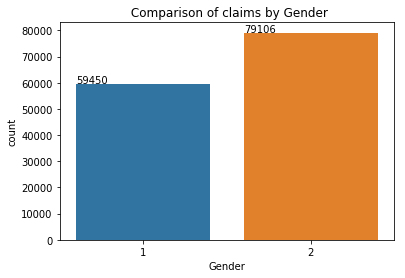

In [78]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=df_train_ben)
plt.title(' Comparison of claims by Gender')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [47]:
df_train_ben['Race'].unique()

array([1, 2, 3, 5])

In [48]:
df_train_ben['Race'].value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

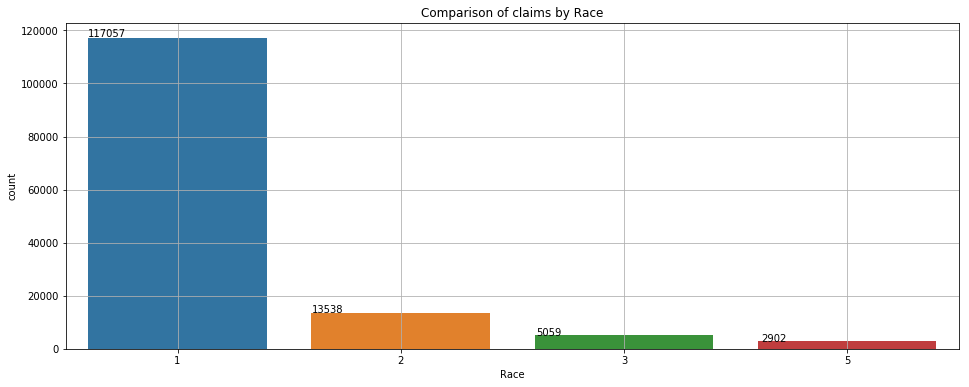

In [74]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x = "Race", data=df_train_ben)
plt.title('Comparison of claims by Race')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.grid(True)


In [53]:
df = df_train_ben[['Race','Gender']].groupby(['Race','Gender']).count()

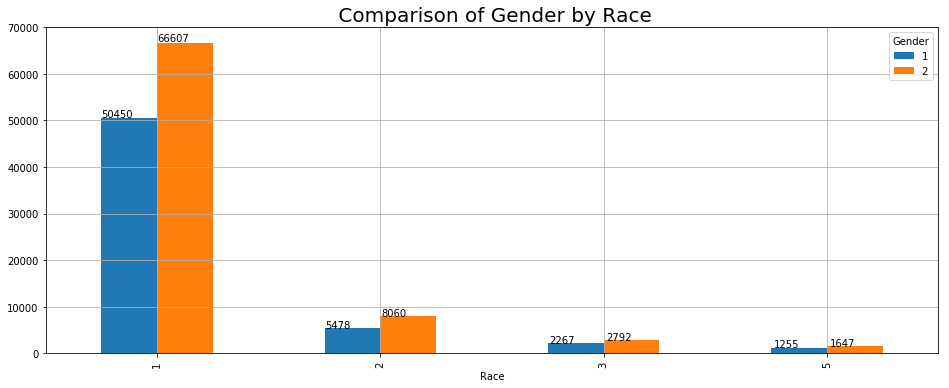

In [71]:
ax = pd.crosstab(df_train_ben['Race'],df_train_ben['Gender']).plot(kind = 'bar',figsize=(16,6))
plt.grid(True)
plt.title(" Comparison of Gender by Race",fontsize = 20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

###### Visualize and describe the IN-Patient data

In [36]:
df_train_inp.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [37]:
df_train_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
BeneID                    40474 non-null object
ClaimID                   40474 non-null object
ClaimStartDt              40474 non-null object
ClaimEndDt                40474 non-null object
Provider                  40474 non-null object
InscClaimAmtReimbursed    40474 non-null int64
AttendingPhysician        40362 non-null object
OperatingPhysician        23830 non-null object
OtherPhysician            4690 non-null object
AdmissionDt               40474 non-null object
ClmAdmitDiagnosisCode     40474 non-null object
DeductibleAmtPaid         39575 non-null float64
DischargeDt               40474 non-null object
DiagnosisGroupCode        40474 non-null object
ClmDiagnosisCode_1        40474 non-null object
ClmDiagnosisCode_2        40248 non-null object
ClmDiagnosisCode_3        39798 non-null object
ClmDiagnosisCode_4        38940 non-null object
ClmDiagnosisCode_5        37

In [38]:
in_missing_df = {}
for a in df_train_inp.columns[df_train_inp.isna().any()].tolist():
    #print(a,' has ',df_train_inp[a].isna().sum())
    in_missing_df[a] = df_train_inp[a].isna().sum()
    
in_missing_df = pd.DataFrame.from_dict(in_missing_df, orient = 'index', columns=['Count of missing values'])

In [39]:
in_missing_df

,Count of missing values
AttendingPhysician,112
OperatingPhysician,16644
OtherPhysician,35784
DeductibleAmtPaid,899
ClmDiagnosisCode_2,226
ClmDiagnosisCode_3,676
ClmDiagnosisCode_4,1534
ClmDiagnosisCode_5,2894
ClmDiagnosisCode_6,4838
ClmDiagnosisCode_7,7258


##### So from the above analysis it is imperative that we have to impute the data/fill in the missing values so that the information is not missed , analyses is not skewd and is statistically valid.

In [79]:
df_train_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [93]:
len(df_train_inp['BeneID'].unique())

31289

In [99]:
# let's see how many of the benficiaries have multiple claims
df_bene_id = df_train_inp['BeneID'].value_counts()

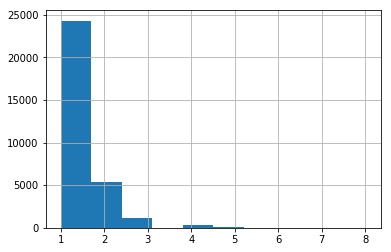

In [100]:
df_bene_id.hist()

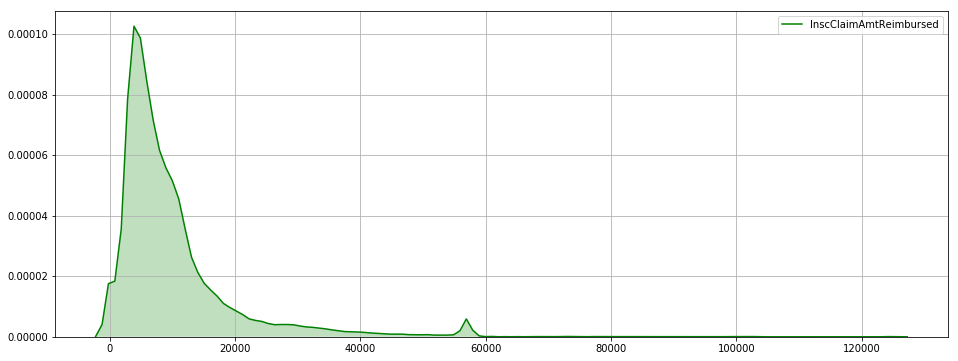

In [97]:
# Let's visualize InscClaimAmtReimbursed
plt.figure(figsize=(16,6))
sns.kdeplot(df_train_inp['InscClaimAmtReimbursed'], shade=True, color = 'g')
plt.grid(True)

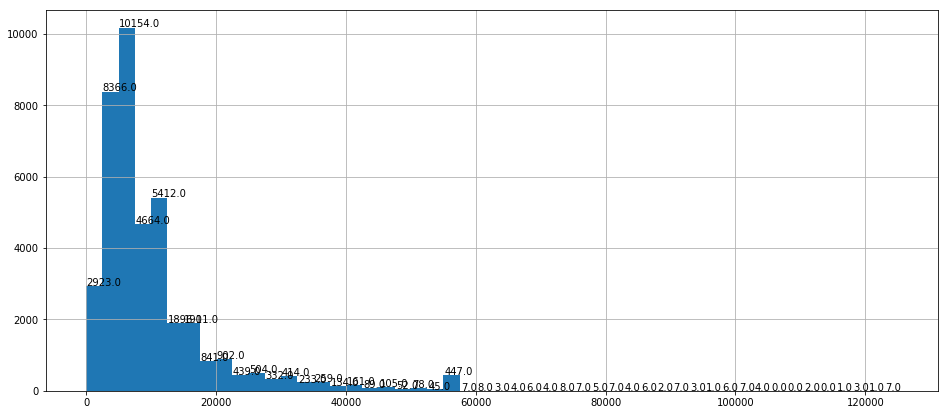

In [92]:
plt.figure(figsize=(16,7))
ax = df_train_inp['InscClaimAmtReimbursed'].hist(bins=50)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [101]:
# Provider
len(df_train_inp['Provider'].unique())

2092

In [118]:
df_provider

PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
PRV56560    248
PRV54742    231
PRV55230    225
PRV52340    224
PRV51501    223
PRV56416    214
PRV52135    210
PRV54955    205
PRV51560    200
PRV51244    200
PRV54765    196
PRV53808    195
PRV51940    193
PRV57191    185
PRV52021    181
PRV52846    175
PRV52821    173
PRV55194    169
PRV52903    167
PRV52120    165
PRV51390    164
PRV52100    164
PRV51146    162
PRV52123    162
PRV51145    161
PRV51471    161
PRV53712    161
PRV55019    158
PRV54986    153
PRV51614    148
PRV52642    146
PRV52574    146
PRV53692    146
PRV51948    143
PRV55215    143
PRV54894    138
PRV52178    133
PRV53769    132
PRV54936    131
PRV53401    130
PRV55435    128
PRV55849    128
PRV51578    122
PRV56647    121
PRV52985    121
Name: Provider, dtype: int64

In [119]:
df_provider_50 = pd.DataFrame(df_train_inp['Provider'].value_counts().head(50))

In [121]:
df_provider_50.T

,PRV52019,PRV55462,PRV54367,PRV53706,PRV55209,PRV56560,PRV54742,PRV55230,PRV52340,PRV51501,...,PRV54894,PRV52178,PRV53769,PRV54936,PRV53401,PRV55435,PRV55849,PRV51578,PRV56647,PRV52985
Provider,516,386,322,282,275,248,231,225,224,223,...,138,133,132,131,130,128,128,122,121,121


Text(0.5, 0, 'Insurance Providers ')

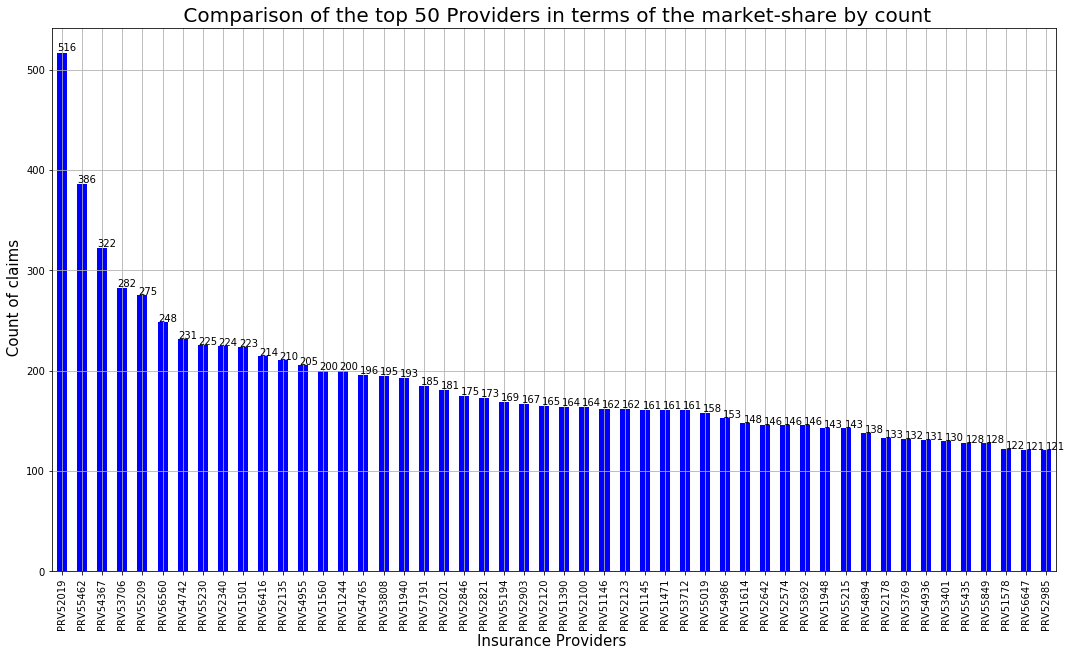

In [145]:
# let's plot top 50 providers
df_provider = (df_train_inp['Provider'].value_counts().head(50))
ax = df_provider.T.plot(kind='bar', figsize = (18, 10) , grid = True ,colormap='bwr')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title(" Comparison of the top 50 Providers in terms of the market-share by count",fontsize=20 )
plt.ylabel(' Count of claims', fontsize = 15)
plt.xlabel('Insurance Providers ', fontsize = 15)

In [138]:
# AttendingPhysician
len(df_train_inp['AttendingPhysician'].unique())

11605

In [141]:
df_attending_physician = df_train_inp['AttendingPhysician'].value_counts().head(50)

Text(0.5, 0, 'Physician ')

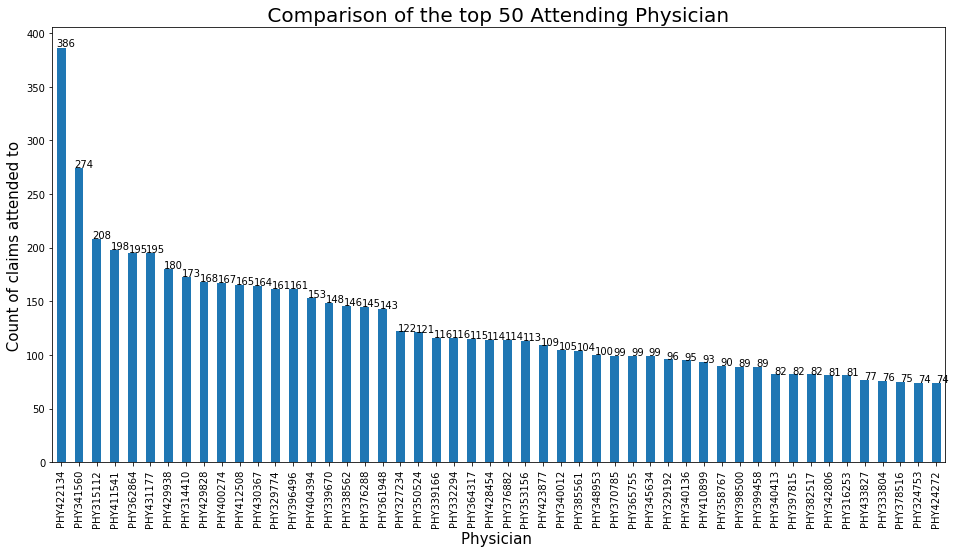

In [146]:
ax = df_attending_physician.T.plot(kind = 'bar' , figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title(" Comparison of the top 50 Attending Physician ",fontsize=20 )
plt.ylabel(' Count of claims attended to ', fontsize = 15)
plt.xlabel('Physician ', fontsize = 15)

###### Visualize and describe the Out-Patient data

In [148]:
df_train_out.shape

(517737, 27)

In [149]:
df_train_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [147]:
df_train_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
BeneID                    517737 non-null object
ClaimID                   517737 non-null object
ClaimStartDt              517737 non-null object
ClaimEndDt                517737 non-null object
Provider                  517737 non-null object
InscClaimAmtReimbursed    517737 non-null int64
AttendingPhysician        516341 non-null object
OperatingPhysician        90617 non-null object
OtherPhysician            195046 non-null object
ClmDiagnosisCode_1        507284 non-null object
ClmDiagnosisCode_2        322357 non-null object
ClmDiagnosisCode_3        203257 non-null object
ClmDiagnosisCode_4        125596 non-null object
ClmDiagnosisCode_5        74344 non-null object
ClmDiagnosisCode_6        48756 non-null object
ClmDiagnosisCode_7        32961 non-null object
ClmDiagnosisCode_8        22912 non-null object
ClmDiagnosisCode_9        14838 non-null object
ClmDiagnosisCo

In [157]:
# check for the features of the in-patient and not in out-patient dataset
miss_col_out = []
for a in df_train_inp.columns.tolist():
    if a not in df_train_out.columns.tolist():
        miss_col_out.append(a)

In [158]:
# check for the features of the out-patient and not in in-patient dataset
miss_col_in = []
for a in df_train_out.columns.tolist():
    if a not in df_train_inp.columns.tolist():
        miss_col_in.append(a)

In [156]:
miss_col_out , miss_col_in

(['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode'], [])